In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import iris
import numpy as np

In [9]:
%matplotlib inline

In [10]:
gfdl_hist = pd.read_csv('ESM4_historical_D1.annual.ozone_budget_o3dtdyn.txt', skiprows=1, parse_dates=['Years'])
gfdl_hist.set_index('Years', inplace=True)
gfdl_ssp370 = pd.read_csv('ESM4_ssp370_D1.annual.ozone_budget_o3dtdyn.txt', skiprows=1, parse_dates=['Years'])
gfdl_ssp370.set_index('Years', inplace=True)
gfdl = gfdl_hist.append(gfdl_ssp370)

In [11]:
giss = pd.read_csv('GISS.CMIP6.historical.csv',  parse_dates=['year'])

In [12]:
giss.set_index('year', inplace=True)

In [13]:
STE = iris.AttributeConstraint(STASH='m01s50i051')
pv_tropmask = iris.AttributeConstraint(STASH='m01s50i062')
wmo_tropmask = iris.AttributeConstraint(STASH='m01s50i064')

### PI STE

#### PV online tropopause

In [16]:
bx411_ste = iris.load('/gws/nopw/j04/htap2/ptg21/u-bx411/pp_files_ox_eval_py//*186*.pp', STE)[0]
bx411_ste_total = bx411_ste.collapsed(['latitude','longitude', 'model_level_number'], iris.analysis.SUM)
ukesm1_pv_pi = np.mean(bx411_ste_total.data*0.048*360.*3600.*24./1e9)
print('PI STE w.r.t. PV online', ukesm1_pv_pi )

/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/rules.py:334: UserWarning: Unable to create instance of HybridHeightFactory. The source data contains no field(s) for 'orography'.
  warnings.warn(msg.format(factory=factory_name))
/opt/jaspy/lib/python3.7/site-packages/iris/cube.py:3180: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/opt/jaspy/lib/python3.7/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'model_level_number'.
  warnings.warn(msg.format(self.name()))
/opt/jaspy/lib/python3.7/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/opt/jaspy/lib/python3.7/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude

PI STE w.r.t. PV online 80.76809


#### PV offline tropopause

In [18]:
bx467_ste = iris.load('/gws/nopw/j04/htap2/ptg21/u-bx467/pp_files_ox_eval_py//*186*.pp', STE)[0]
bx467_ste_pvtrop = iris.load('/gws/nopw/j04//htap2/ptg21/u-bx467/pp_files_ox_eval_py//*186*.pp', pv_tropmask)[0]
bx467_ste_pv_offl = iris.analysis.maths.multiply(bx467_ste, bx467_ste_pvtrop)#, dim=None, in_place=False)
bx467_ste_pv_offl_total = bx467_ste_pv_offl.collapsed(['latitude','longitude', 'model_level_number'], iris.analysis.SUM)
ukesm1_pv_offline_pi = np.mean(bx467_ste_pv_offl_total.data*0.048*360.*3600.*24./1e9)
print('PI STE w.r.t PV offline',  ukesm1_pv_offline_pi)

PI STE w.r.t PV offline 416.09888


In [30]:
wmo_trop_hgt = iris.AttributeConstraint(STASH='m01s30i453')
bx467_ste = iris.load('/gws/nopw/j04/htap2/ptg21/u-bx467/pp_files_ox_eval_py//*186*.pp', STE)[0]
bx467_ste_wmotrop = iris.load('/gws/nopw/j04/htap2/ptg21/u-bx467/pp_files_ox_eval_trop_py///*186*.pp', wmo_trop_hgt)[0]

level_height = bx467_ste.coord('level_height').points
tropo_height = bx467_ste_wmotrop.data
tropo_mask_467 = np.empty([10,85,144,192])

for tvar in range(tropo_mask_467.shape[0]):
    for latvar in range(tropo_mask_467.shape[2]):
        for lonvar in range(tropo_mask_467.shape[3]):
            tropo_mask_467[tvar, :, latvar, lonvar] = np.where(level_height<tropo_height[tvar, latvar, lonvar], 1, 0)

bx467_ste_wmo_offl = iris.analysis.maths.multiply(bx467_ste, tropo_mask_467)#, dim=None, in_place=False)
bx467_ste_wmo_offl_total = bx467_ste_wmo_offl.collapsed(['latitude','longitude', 'model_level_number'], iris.analysis.SUM)
ukesm_wmo_offline_pi = np.mean(bx467_ste_wmo_offl_total.data*0.048*360.*3600.*24./1e9)
print('PI STE w.r.t WMO offline', ukesm_wmo_offline_pi )

/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/rules.py:334: UserWarning: Unable to create instance of HybridHeightFactory. The source data contains no field(s) for 'orography'.
  warnings.warn(msg.format(factory=factory_name))


PI STE w.r.t WMO offline 376.58551404215723


# PD STE

#### PV offline tropopause 

In [25]:
bx468_ste = iris.load('/gws/nopw/j04/htap2/ptg21/u-bx468/pp_files_ox_eval_py//*199*.pp', STE)[0]
bx468_ste_pvtrop = iris.load('/gws/nopw/j04//htap2/ptg21/u-bx468/pp_files_ox_eval_py//*199*.pp', pv_tropmask)[0]
bx468_ste_pv_offl = iris.analysis.maths.multiply(bx468_ste, bx468_ste_pvtrop)#, dim=None, in_place=False)
bx468_ste_pv_offl_total = bx468_ste_pv_offl.collapsed(['latitude','longitude', 'model_level_number'], iris.analysis.SUM)
ukesm1_pv_offline_pd = np.mean(bx468_ste_pv_offl_total.data*0.048*360.*3600.*24./1e9)
print('PD STE w.r.t PV offline', ukesm1_pv_offline_pd )

PD STE w.r.t PV offline 274.61578


#### WMO offline tropopause  - not available!! Use WMO Trop HGT to make a mask

In [26]:
bx468_ste = iris.load('/gws/nopw/j04/htap2/ptg21/u-bx468/pp_files_ox_eval_py//*199*.pp', STE)[0]
wmo_trop_hgt = iris.AttributeConstraint(STASH='m01s30i453')
bx468_ste_wmotrop = iris.load('/gws/nopw/j04//htap2/ptg21/u-bx468/pp_files_ox_eval_trop_py///*199*.pp', wmo_trop_hgt)[0]
level_height = bx468_ste.coord('level_height').points
tropo_height = bx468_ste_wmotrop.data
tropo_mask_468 = np.empty([10,85,144,192])

for tvar in range(tropo_mask_468.shape[0]):
    for latvar in range(tropo_mask_468.shape[2]):
        for lonvar in range(tropo_mask_468.shape[3]):
            tropo_mask_468[tvar, :, latvar, lonvar] = np.where(level_height<tropo_height[tvar, latvar, lonvar], 1, 0)

In [28]:
bx468_ste_wmo_offl = iris.analysis.maths.multiply(bx468_ste, tropo_mask_468)#, dim=None, in_place=False)
bx468_ste_wmo_offl_total = bx468_ste_wmo_offl.collapsed(['latitude','longitude', 'model_level_number'], iris.analysis.SUM)
ukesm_wmo_offline_pd = np.mean(bx468_ste_wmo_offl_total.data*0.048*360.*3600.*24./1e9)
print('PD STE w.r.t WMO offline', ukesm_wmo_offline_pd )

/opt/jaspy/lib/python3.7/site-packages/iris/cube.py:3180: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/opt/jaspy/lib/python3.7/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'model_level_number'.
  warnings.warn(msg.format(self.name()))
/opt/jaspy/lib/python3.7/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/opt/jaspy/lib/python3.7/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


PD STE w.r.t WMO offline 229.04947863670918


## SUMMARY PLOT

In [31]:
ukesm1_pv_offline=pd.DataFrame(index=[pd.to_datetime('1860', format='%Y'), 
                                  pd.to_datetime('1989', format='%Y')],
                           data=[ukesm1_pv_offline_pi, ukesm1_pv_offline_pd],
                    columns=['UKESM1_diagnosed_PV_Offline_STE'])

ukesm1_wmo_offline=pd.DataFrame(index=[pd.to_datetime('1860', format='%Y'), 
                                  pd.to_datetime('1989', format='%Y')],
                           data=[ukesm_wmo_offline_pi, ukesm_wmo_offline_pd],
                    columns=['UKESM1_diagnosed_WMO_Offline_STE'])

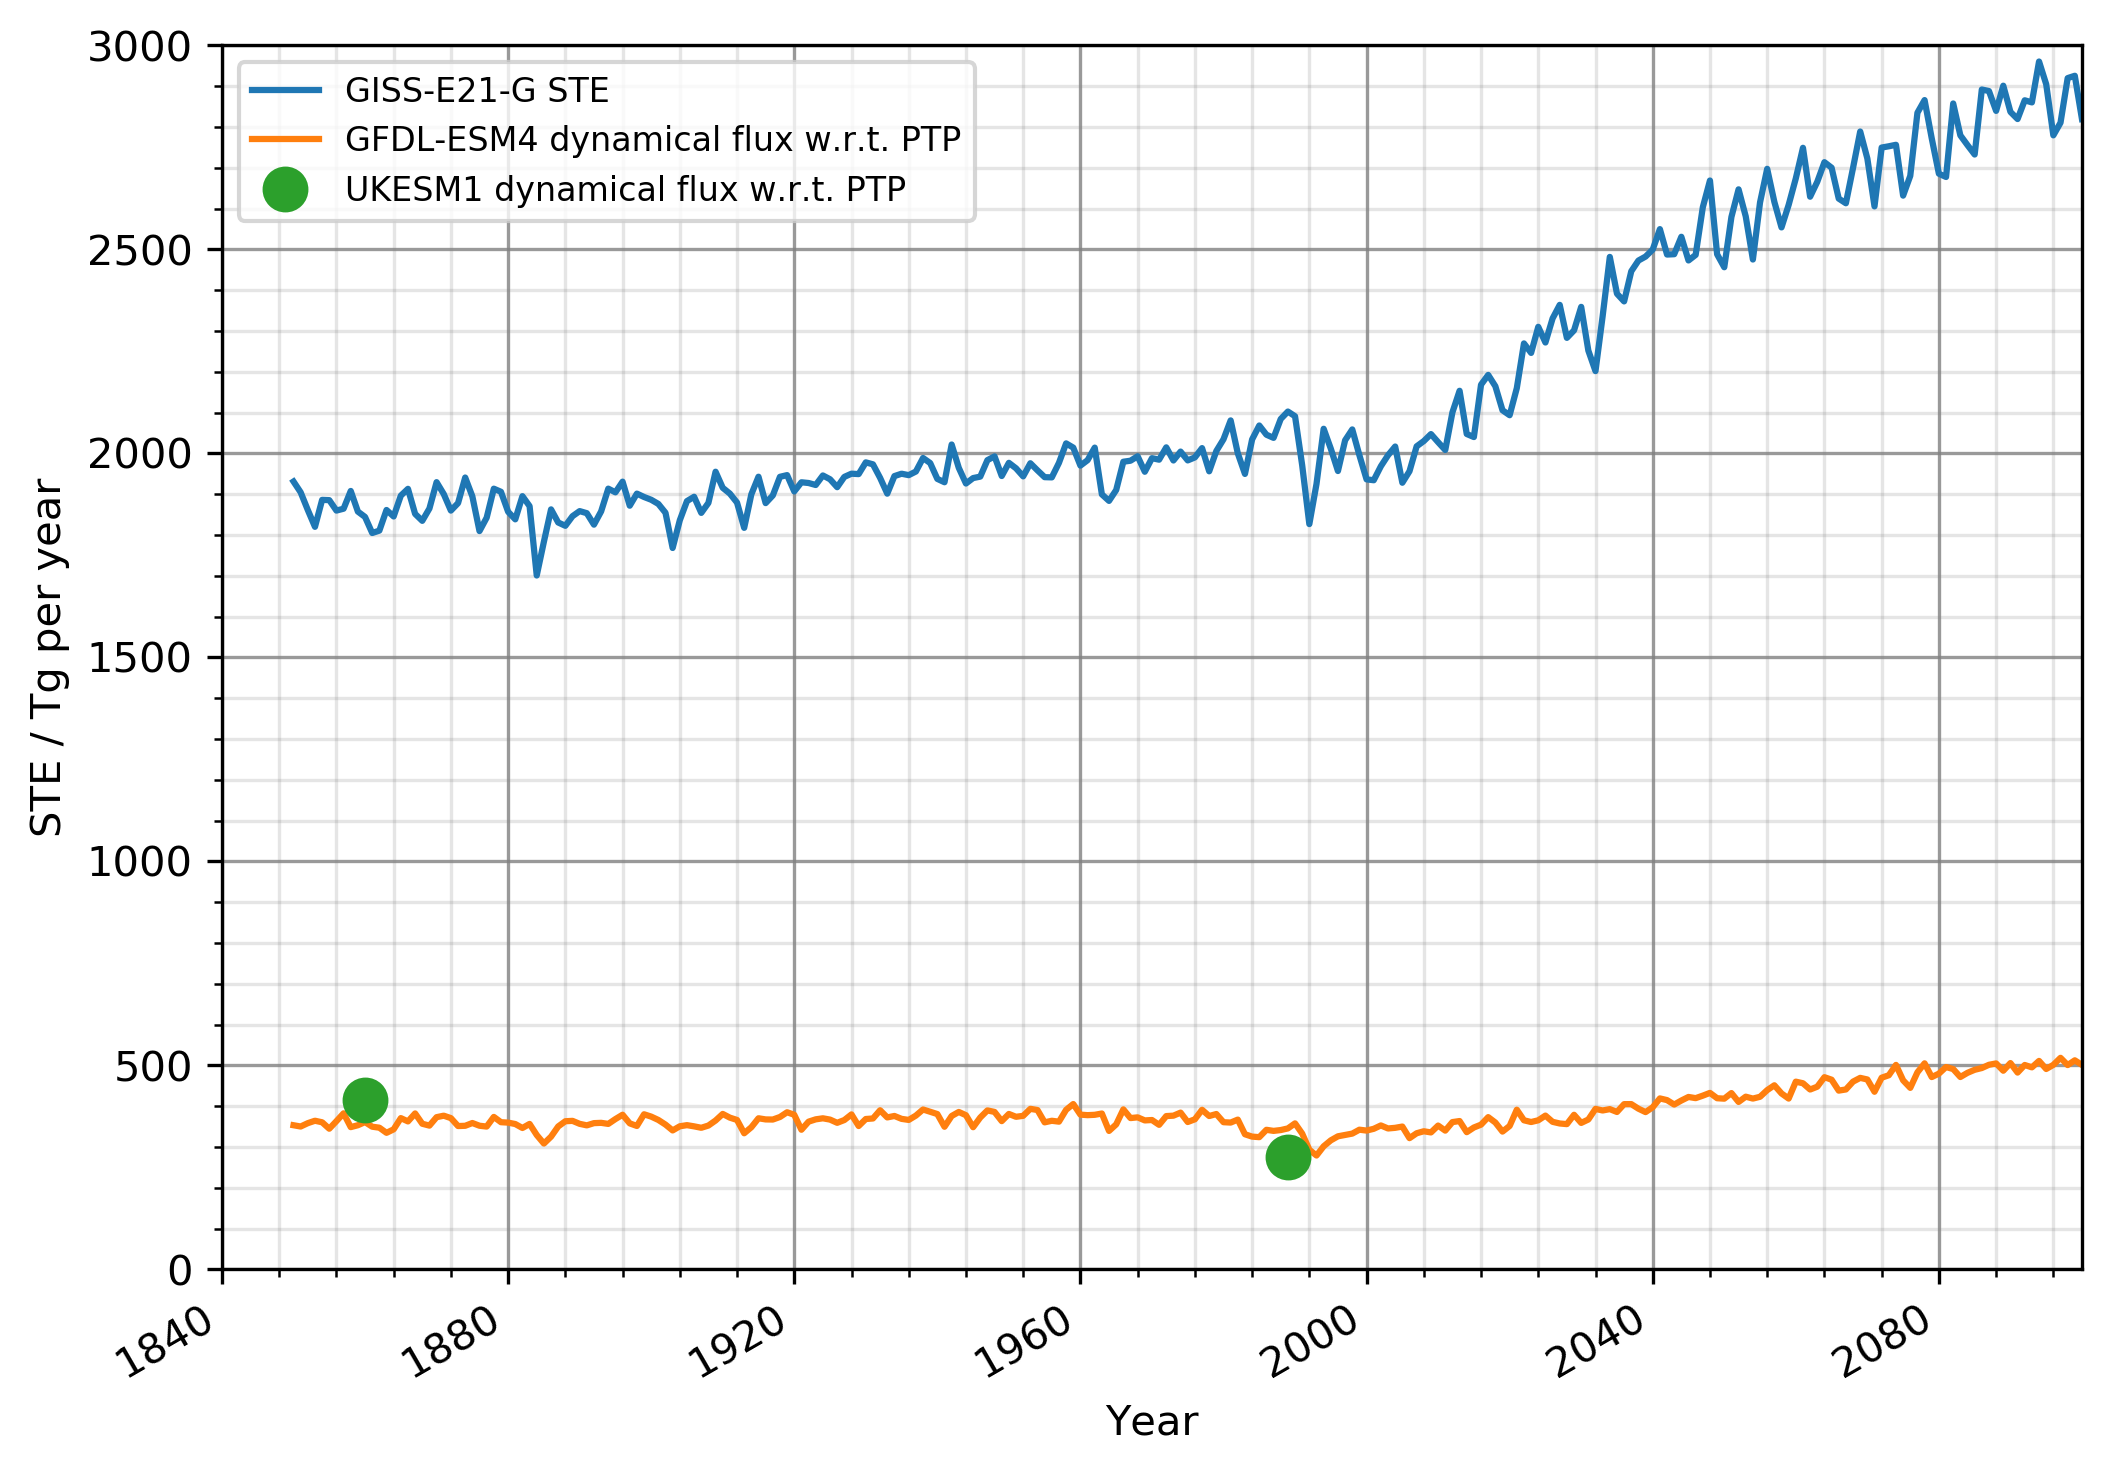

In [32]:
fig, ax = plt.subplots(figsize=(8,6), dpi=300)
giss['STE (Tg/yr)'].plot(ax=ax, label='GISS-E21-G STE')
#giss['STE100 (Tg/yr)'].plot(ax=ax, label='GISS-E2.1-H transport across 100 mbar')
# giss['STE50 (Tg/yr)'].plot(ax=ax, label='GISS-E2.1-H transport across 50 mbar')
gfdl[' O3AdvectiveFlux(O3dt_dyn)_ptp'].plot(ax=ax, label='GFDL-ESM4 dynamical flux w.r.t. PTP')
ukesm1_pv_offline['UKESM1_diagnosed_PV_Offline_STE'].plot(ax=ax, label='UKESM1 dynamical flux w.r.t. PTP', markersize=10, style='o')
#ukesm1_wmo_offline['UKESM1_diagnosed_WMO_Offline_STE'].plot(ax=ax, label='UKESM1 using WMO tropopause applied offline. [bx467, bx468]', markersize=10, style='8')
#ukesm1_pv['UKESM1_diagnosed_PV_STE'].plot(ax=ax, label='UKESM1 using PV+380K tropopause. [bx411,bx417] ', markersize=10, style='o')
#ukesm1_wmo['UKESM1_diagnosed_WMO_STE'].plot(ax=ax, label='UKESM1 using WMO tropopause. [bx521, by605]', markersize=10, style='s')
# ukesm1_pv_double_mask['UKESM1_diagnosed_PV_STE_applied_mask_twice'].plot(ax=ax, label='UKESM1 using PV tropopause applied twice: online and offline.  [bx411, bx417]', markersize=10, style='+')
plt.ylabel('STE / Tg per year')

plt.grid(b=True, which='minor', color='gray', linestyle='-', alpha=0.2)
plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.8)
plt.xlabel('Year')
plt.ylim(0,3000)
plt.minorticks_on()
plt.xlim(pd.to_datetime('1840', format='%Y'),
                                 pd.to_datetime('2100', format='%Y'))

plt.legend(loc='upper left', fontsize=8)
plt.savefig('fig_ssa.svg')

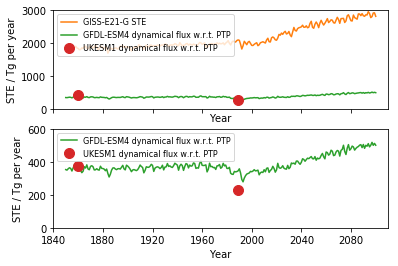

In [33]:
import matplotlib.pyplot as plt
cmap = plt.get_cmap("tab10")

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(giss['STE (Tg/yr)'], label='GISS-E21-G STE', color=cmap(1))
ax1.plot(gfdl[' O3AdvectiveFlux(O3dt_dyn)_ptp'], label='GFDL-ESM4 dynamical flux w.r.t. PTP',  color=cmap(2))
ax1.plot(ukesm1_pv_offline['UKESM1_diagnosed_PV_Offline_STE'], label='UKESM1 dynamical flux w.r.t. PTP',lw=0, markersize=10, marker='o', color=cmap(3))
ax1.set_ylabel('STE / Tg per year')
ax1.set_xlabel('Year')
ax1.set_ylim(0,3000)
ax1.legend(loc='upper left', fontsize=8)

ax2.plot(gfdl[' O3AdvectiveFlux(O3dt_dyn)_ptp'], label='GFDL-ESM4 dynamical flux w.r.t. PTP', color=cmap(2))
ax2.plot(ukesm1_wmo_offline['UKESM1_diagnosed_WMO_Offline_STE'], label='UKESM1 dynamical flux w.r.t. PTP', lw=0, markersize=10, marker='o', color=cmap(3))
plt.ylabel('STE / Tg per year')
plt.xlabel('Year')
plt.ylim(0,600)
plt.xlim(pd.to_datetime('1840', format='%Y'),pd.to_datetime('2110', format='%Y'))
ax2.legend(loc='upper left', fontsize=8)
plt.savefig('fig_ssb.svg')